### Combined script for all conditions

In [7]:
from pathlib import Path
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.transforms import blended_transform_factory
from matplotlib.collections import LineCollection
import seaborn as sns

import trompy as tp
import csv


colors_restricted = "#219C90"
colors_adlib_light = "#9C89B8" 
colors_adlib_dark = "#0059b3"
colors_sucralose = "#af9991"

In [8]:
DATAFOLDER = Path("C:/Data/hislight_pickles/")
FIGSFOLDER = Path("C:/Users/kvo019/OneDrive - UiT Office 365/Pipette 2/People/Linnea/Manuscripts/hislight paper/figures")
STATSFOLDER = Path("C:/Users/kvo019/OneDrive - UiT Office 365/Pipette 2/People/Linnea/Manuscripts/hislight paper/stats")

with open(DATAFOLDER / "restricted_dark.pickle", 'rb') as handle:
    restricted_dark = pickle.load(handle)

with open(DATAFOLDER / "adlib_dark.pickle", 'rb') as handle:
    adlib_dark = pickle.load(handle)

with open(DATAFOLDER / "adlib_light.pickle", 'rb') as handle:
    adlib_light = pickle.load(handle)

with open(DATAFOLDER / "adlib_sucralose.pickle", 'rb') as handle:
    adlib_sucralose = pickle.load(handle)

In [9]:
def get_list_of_mice(data):

    mice_to_exclude = ["HL313", "HL314", "HL315", "HL316", "HL317", "HL318", "HL306", "HL308",
                        "HL202", "HL205", "HL206", "HL211",
                        "HL301", "HL304", "HL305"]
    
    #"HL202", "HL205", "HL206", "HL211" have poor placements without virus in PVH
    #HL 306, 308 have no virus
    #HL301, HL304, HL305 have poor fiber placement
    #HL313 - HL318 are control mice
    
    list_of_mice = []

    for key, val in adlib_dark.items():
        if val["mouse_ID"] not in list_of_mice and val["mouse_ID"] not in mice_to_exclude:
            list_of_mice.append(val["mouse_ID"])
            
    return list_of_mice

In [10]:
get_list_of_mice(restricted_dark)

['HL203', 'HL204', 'HL207', 'HL208', 'HL209', 'HL210', 'HL212']

In [11]:
def get_snips(data):
    
    list_of_mice = get_list_of_mice(data)

    snips_mean_start= []
    snips_mean_end = []
    snips_mean_full = []

    kwargs={"bins":150, "trial_length":15, "baseline_length":5}   

    pre = 5
    post = 10
    mineventlength=8
    binlength=0.1

    for mouse in list_of_mice:
        snips_start = []
        snips_end = []
        snips_full = []

        for key, val in data.items():
            if val["mouse_ID"]==mouse:
                if len(val["licks"]) < 10:
                    continue

                lickdata= tp.lickCalc(val["licks"], minrunlength=3)

                snips_start.append(tp.snipper(val["corrected"], lickdata["rStart"], val["fs"], **kwargs)[0])
                snips_end.append(tp.snipper(val["corrected"], lickdata["rEnd"], val["fs"], **kwargs)[0])

                snipper = tp.Snipper(val["corrected"],
                                        lickdata["rStart"],
                                        end=lickdata["rEnd"],
                                        fs=val["fs"],
                                        pre=pre,
                                        post=post,
                                        binlength=binlength,
                                        zscore=True
                                        )

                snipper.truncate_to_same_length(cols_to_add=10, mineventlength=8, eventbalance=[6,2])
                snipper.find_potential_artifacts(threshold=12, method="absolute_diff", showplot=True, remove=True)
                snips_full.append(snipper.snips)


        snips_start = np.vstack(snips_start)
        snips_end = np.vstack(snips_end)
        
        try:
            snips_full = np.vstack(snips_full)
            snips_mean_full.append(np.mean(snips_full, axis=0))
            print("adding this mouse")
        except:
            print("no snips to concatenate")

        snips_mean_start.append(np.mean(snips_start, axis=0))
        snips_mean_end.append(np.mean(snips_end, axis=0))
   
    snips_mean_full = np.array(snips_mean_full)
    
    return snips_mean_start, snips_mean_end, snips_mean_full

<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>

C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di


Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 2 potential artifacts.
adding this mouse

C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di


<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>

C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di


Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 1 potential artifacts.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.


C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di

adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.nd

C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di

<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.

C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di

Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0.0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
<class 'numpy.ndarray'>
Found 0 potential artifacts.
No artifacts found.
adding this mouse


C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array([self.put_snip_in_bins(snip) for snip in self.snips])
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.snips = np.array(z_snips)
C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\snipper_class.py:215: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with di

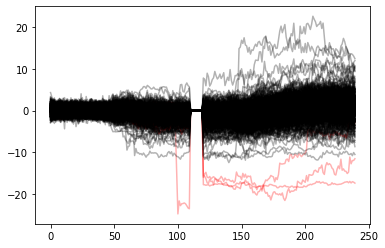

In [12]:
#getting snips
restricted_start, restricted_end, restricted_full = get_snips(restricted_dark)
dark_start, dark_end, dark_full = get_snips(adlib_dark)
light_start, light_end, light_full = get_snips(adlib_light)
sucralose_start, sucralose_end, sucralose_full = get_snips(adlib_sucralose)



In [13]:
def get_licks(data):
    
    mice = get_list_of_mice(data)
    licks = []
    
    for mouse in mice:
        temp_licks = 0
        sessions = 0
        for key, val in data.items():
            if val["mouse_ID"]==mouse:
                #print(val)
                onset = val["licks"]
                temp_licks = temp_licks + len(onset)
                sessions = sessions + 1
        licks.append(temp_licks / sessions)
        
    return np.array(licks)
      
def get_runs(onset, min_run_length=3, run_threshold=8):

    current_list = []
    runs = []
    
    for i in range(1, len(onset)):
        time_diff = (onset[i] - onset[i - 1])
        if time_diff <= run_threshold:
            current_list.append(onset[i])
        else:
            current_list = [onset[i]]
            runs.append(current_list)
            
    no_short_runs = []
    
    for run in runs:
        if len(run) > min_run_length-1:
            no_short_runs.append(run)
     
    time_zeroed_runs = []
    
    for run in no_short_runs:
        time_zeroed_runs.append([t-run[0] for t in run])

    return time_zeroed_runs

def get_runs_from_all (data):
    
    mice = get_list_of_mice(data)
    all_runs = []

    for mouse in mice:
        temp_runs = []
        for key, val in data.items():
            if val["mouse_ID"] == mouse:
                onset = val["licks"]
                temp_runs.append(get_runs(onset))

        all_runs.append(tp.flatten_list(temp_runs))

    return all_runs

def sort_runs(runs):
    sort_order = np.argsort([x[-1]for x in runs])
    runs_sorted = [runs[i] for i in sort_order]
    
    return runs_sorted

def get_run_lengths_for_pseudo_raster(runs, color="red"):
    lines = []
    for idx, trial in enumerate(runs):
            lines.append([(trial[0], idx), (trial[-1], idx)])
        
    return LineCollection(lines, color=color, linewidth=0.6)

get_licks(adlib_dark)

array([ 946. , 1486.5, 1343. , 1405.5,  973.5,  835.5,  639.5])

In [14]:
#getting behavior

restricted_licks = get_licks(restricted_dark)
adlib_dark_licks = get_licks(adlib_dark)
adlib_light_licks = get_licks(adlib_light)
sucralose_licks = get_licks(adlib_sucralose)

restricted_runs = get_runs_from_all(restricted_dark)
adlib_dark_runs = get_runs_from_all(adlib_dark)
adlib_light_runs = get_runs_from_all(adlib_light)
sucralose_runs = get_runs_from_all(adlib_sucralose)

bins= np.arange(-5,40,1)

# restricted_hist = np.histogram(tp.flatten_list(restricted_runs), bins=bins)
# adlib_dark_hist = np.histogram(tp.flatten_list(adlib_dark_runs), bins=bins)
# adlib_light_hist = np.histogram(tp.flatten_list(adlib_light_runs), bins=bins)
# sucralose_hist = np.histogram(tp.flatten_list(sucralose_runs), bins=bins)

restricted_sorted_runs = sort_runs(tp.flatten_list(restricted_runs))
adlib_dark_sorted_runs = sort_runs(tp.flatten_list(adlib_dark_runs))
adlib_light_sorted_runs = sort_runs(tp.flatten_list(adlib_light_runs))
sucralose_sorted_runs = sort_runs(tp.flatten_list(sucralose_runs))

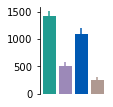

In [8]:
# average licks per session
f, ax = plt.subplots(figsize=(1.2,1.6))

ax.bar([1,2,3,4],
       [np.mean(restricted_licks),
        np.mean(adlib_light_licks),
        np.mean(adlib_dark_licks),
        np.mean(sucralose_licks)
        ],
       color=[colors_restricted, colors_adlib_light, colors_adlib_dark, colors_sucralose]
         )

for x, ydata, color in zip([1,2,3,4],
                            [restricted_licks,
                             adlib_light_licks,
                            adlib_dark_licks,
                            sucralose_licks
                            ],
                            [colors_restricted, colors_adlib_light, colors_adlib_dark, colors_sucralose]
                            ):
    
    ax.errorbar(x, np.mean(ydata),
                yerr=np.std(ydata) / np.sqrt(len(ydata)),
                color=color,
                zorder=0
                      ),
    
ax.set_xticks([])
# ax.set_ylim([-25, 0])
ax.set_yticks([0, 500, 1000, 1500])
#ax.set_yticklabels([])

for spine in ["top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)
    

#f.savefig(FIGSFOLDER / "PVH_licks_per_session.pdf")


## SAVE DATA FOR STATS
data = np.column_stack((restricted_licks, adlib_dark_licks, adlib_light_licks, sucralose_licks))
file_path = STATSFOLDER / 'PVH_licks_per_session.csv'

#np.savetxt(str(file_path), data, delimiter=',', fmt='%.6f', header='Restricted Licks, Adlib Dark Licks, Adlib Light Licks, Sucralose Licks')



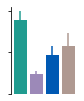

In [9]:
def get_number_of_runs(runs, nsessions):
    return [len(x)/nsessions for x in runs]

def get_average_run_length(runs):
    return [np.mean([len(x) for x in y]) for y in runs]

# average number of runs per session
f, ax = plt.subplots(figsize=(1.2,1.6))

ax.bar([1,2,3,4],
       [np.mean(get_number_of_runs(restricted_runs, 3)),
        np.mean(get_number_of_runs(adlib_light_runs, 3)),
        np.mean(get_number_of_runs(adlib_dark_runs, 2)),
        np.mean(get_number_of_runs(sucralose_runs, 2))
        ],
       color=[colors_restricted, colors_adlib_light, colors_adlib_dark, colors_sucralose]
         )

for x, ydata, color in zip([1,2,3,4],
                            [get_number_of_runs(restricted_runs, 3),
                            get_number_of_runs(adlib_light_runs, 3),
                            get_number_of_runs(adlib_dark_runs, 2),
                            get_number_of_runs(sucralose_runs, 2)
                            ],
                            [colors_restricted, colors_adlib_light, colors_adlib_dark, colors_sucralose]
                            ):
    
    ax.errorbar(x, np.mean(ydata),
                yerr=np.std(ydata) / np.sqrt(len(ydata)),
                color=color,
                zorder=0
                      ),
    
ax.set_xticks([])
# ax.set_ylim([-25, 0])
ax.set_yticks([0, 10, 20])
ax.set_yticklabels([])

for spine in ["top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)
    
f.savefig(FIGSFOLDER / "PVH_runs_per_session.pdf")



# Making file with avg number of runs per session
number_runs_restricted = get_number_of_runs(restricted_runs, 3)
number_runs_light = get_number_of_runs(adlib_light_runs, 3)
number_runs_dark = get_number_of_runs(adlib_dark_runs, 2)
number_runs_sucralose = get_number_of_runs(sucralose_runs, 2)

number_runs_all = np.column_stack([number_runs_restricted, number_runs_light, number_runs_dark, number_runs_sucralose])

file_path = STATSFOLDER / 'PVH_number_of_runs_per_session.csv'

#np.savetxt(file_path, number_runs_all, delimiter=',', fmt='%.6f', header='Restricted Runs, Adlib Light Runs, Adlib Dark Runs, Sucralose Runs')

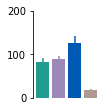

In [10]:
# average run length 
f, ax = plt.subplots(figsize=(1.2,1.6))

ax.bar([1,2,3,4],
       [np.mean(get_average_run_length(restricted_runs)),
        np.mean(get_average_run_length(adlib_light_runs)),
        np.mean(get_average_run_length(adlib_dark_runs)),
        np.mean(get_average_run_length(sucralose_runs))
        ],
       color=[colors_restricted, colors_adlib_light, colors_adlib_dark, colors_sucralose]
         )

for x, ydata, color in zip([1,2,3,4],
                            [get_average_run_length(restricted_runs),
                            get_average_run_length(adlib_light_runs),
                            get_average_run_length(adlib_dark_runs),
                            get_average_run_length(sucralose_runs)
                            ],
                            [colors_restricted, colors_adlib_light, colors_adlib_dark, colors_sucralose]
                            ):
    
    ax.errorbar(x, np.mean(ydata),
                yerr=np.std(ydata) / np.sqrt(len(ydata)),
                color=color,
                zorder=0
                      ),
    
ax.set_xticks([])
# ax.set_ylim([-25, 0])
ax.set_yticks([0, 100, 200])
#ax.set_yticklabels([])

for spine in ["top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)
    
#f.savefig(FIGSFOLDER / "PVH_runlengths.pdf")


# Making file
length_runs_restricted = get_average_run_length(restricted_runs)
length_runs_light = get_average_run_length(adlib_light_runs)
length_runs_dark = get_average_run_length(adlib_dark_runs)
length_runs_sucralose = get_average_run_length(sucralose_runs)

length_runs_all = np.column_stack([length_runs_restricted, length_runs_light, length_runs_dark, length_runs_sucralose])

file_path = STATSFOLDER / 'PVH_length_of_runs.csv'

## Save the data to the file with header
#np.savetxt(file_path, length_runs_all, delimiter=',', fmt='%.6f', header='Restricted Runs, Adlib Light Runs, Adlib Dark Runs, Sucralose Runs', comments='')

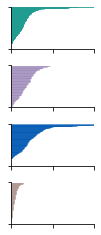

In [11]:

f,ax = plt.subplots(figsize=(1.5, 4),nrows=4, sharex = True, gridspec_kw={"hspace":0.4})
    
data_to_plot1 = get_run_lengths_for_pseudo_raster(restricted_sorted_runs, color=colors_restricted)
data_to_plot2 = get_run_lengths_for_pseudo_raster(adlib_light_sorted_runs, color=colors_adlib_light)
data_to_plot3 = get_run_lengths_for_pseudo_raster(adlib_dark_sorted_runs, color=colors_adlib_dark)
data_to_plot4 = get_run_lengths_for_pseudo_raster(sucralose_sorted_runs, color=colors_sucralose)

ax[0].add_collection(data_to_plot1)
ax[1].add_collection(data_to_plot2)
ax[2].add_collection(data_to_plot3)
ax[3].add_collection(data_to_plot4)

for axis in ax:
    axis.set_yticklabels([])
    axis.set_xticklabels([])

ax[0].set_yticks([0, len(restricted_sorted_runs)])
ax[1].set_yticks([0, len(adlib_light_sorted_runs)])
ax[2].set_yticks([0, len(adlib_dark_sorted_runs)])
ax[3].set_yticks([0, len(sucralose_sorted_runs)])

ax[0].set_xlim(0,100)
ax[1].set_xticks([0,50,100])


for ax in [ax[0],ax[1], ax[2], ax[3]]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

#f.savefig(FIGSFOLDER / "PVH_raster_all.pdf")

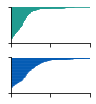

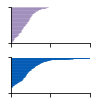

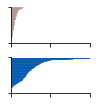

In [12]:
def make_pseudoraster_fig(data1, data2, color1, color2):
    f,ax = plt.subplots(figsize=(1.5, 1.5),nrows=2, sharex = True,
                        gridspec_kw={"hspace":0.4,
                                     "left":0.20,
                                     "right":0.93,
                                     "top":0.95,
                                     "bottom":0.15})
    
    data_to_plot1 = get_run_lengths_for_pseudo_raster(data1, color=color1)
    data_to_plot2 = get_run_lengths_for_pseudo_raster(data2, color=color2)

    ax[0].add_collection(data_to_plot1)
    ax[1].add_collection(data_to_plot2)
    
    for axis in ax:
        axis.set_yticklabels([])
        axis.set_xticklabels([])

    ax[0].set_yticks([0, len(data1)])
    ax[1].set_yticks([0, len(data2)])

    ax[0].set_xlim(0,100)
    ax[1].set_xticks([0,50,100])
    

    for ax in [ax[0],ax[1]]:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
    return f

f = make_pseudoraster_fig(restricted_sorted_runs, adlib_dark_sorted_runs, colors_restricted, colors_adlib_dark)
#f.savefig(FIGSFOLDER / "PVH_hungry_vs_not_raster.pdf")

f = make_pseudoraster_fig(adlib_light_sorted_runs, adlib_dark_sorted_runs, colors_adlib_light, colors_adlib_dark)
#f.savefig(FIGSFOLDER / "PVH_light_vs_dark_raster.pdf")

f = make_pseudoraster_fig(sucralose_sorted_runs, adlib_dark_sorted_runs, colors_sucralose, colors_adlib_dark)
#f.savefig(FIGSFOLDER / "PVH_calories_vs_none_raster.pdf")

In [18]:
restricted_runs_2

[[0.0,
  0.447938559999983,
  0.5578751999999838,
  0.6930431999999769,
  0.8169062399999802,
  0.956989440000001,
  1.0790502399999866,
  1.2348620799999992,
  1.3698662399999932,
  1.5579545599999847,
  1.6729702399999837,
  1.773240319999985,
  1.974927359999981,
  2.0789657599999884,
  2.212003839999994,
  2.349957119999999,
  2.4420351999999923,
  2.614067199999994,
  3.596943359999983,
  3.730964479999983,
  3.861053439999978,
  3.9919615999999962,
  4.122869759999986,
  4.253941760000004,
  4.387799039999976,
  4.521000959999981,
  4.667965439999989,
  4.803952639999977,
  4.936990719999983,
  5.075927039999982,
  5.2238745599999845,
  5.3619916799999885,
  5.508956159999997,
  5.646090239999978,
  5.788958719999982,
  5.932810239999981,
  6.07797248,
  6.220840960000004,
  6.366003199999994,
  6.511001599999986,
  6.661079040000004,
  6.808043519999984,
  6.954844159999993,
  7.101972480000001,
  7.262044159999988,
  7.40687871999998,
  7.511080959999987,
  7.543029759999996,
 

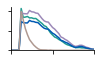

In [17]:
#For Lick frequency

def get_runs_from_all_2 (data):
    mice = get_list_of_mice(data)
    temp_runs = []
    
    for mouse in mice:
        for key, val in data.items():
            if val["mouse_ID"] == mouse:
                onset = val["licks"]
                temp_runs.append(get_runs(onset))

    all_runs = []
    for session in temp_runs:
        for run in session:
            all_runs.append(run)
            
    return all_runs

restricted_runs_2 = get_runs_from_all_2(restricted_dark)
light_runs_2 = get_runs_from_all_2(adlib_light)
dark_runs_2 = get_runs_from_all_2(adlib_dark)
sucralose_runs_2 = get_runs_from_all_2(adlib_sucralose)

bins= np.arange(-5,40,1)

restricted_hist = np.histogram(tp.flatten_list(restricted_runs_2), bins= bins)
light_hist = np.histogram(tp.flatten_list(light_runs_2), bins= bins)
dark_hist = np.histogram(tp.flatten_list(dark_runs_2), bins= bins)
sucralose_hist = np.histogram(tp.flatten_list(sucralose_runs_2), bins= bins)

restricted_freq = restricted_hist[0]/len(restricted_runs_2)
light_freq = light_hist[0]/len(light_runs_2)
dark_freq = light_hist[0]/len(dark_runs_2)
sucralose_freq = sucralose_hist[0]/len(sucralose_runs_2)

f, ax = plt.subplots(figsize=[1.5, 0.8])

ax.plot(restricted_freq, color=colors_restricted)
ax.plot(light_freq, color=colors_adlib_light)
ax.plot(dark_freq, color=colors_adlib_dark)
ax.plot(sucralose_freq,  color=colors_sucralose)

ax.set_xlim(0,4)
ax.set_xticks([0,20,40])

ax.set_ylim(0,5.6)
ax.set_yticks([0, 2.5, 5])

ax.set_yticklabels([])
ax.set_xticklabels([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

f.savefig(FIGSFOLDER / "PVH_lick_frequency.pdf")
 

In [33]:
def get_cumulative (data):
    bins=range(0,1801,300)
    list_of_mice = get_list_of_mice(data) 
    
    licks = [] #empty list where data from all mice will be stored
    cumulative = []
    
    for mouse in list_of_mice:
        temp_lick = []
        temp_histodata = []
        temp_cumulative_licks = [] 
        
        for key, val in data.items():
            if val["mouse_ID"] == mouse:
                temp_lick.append(val["licks"])

        licks.append(np.mean(temp_lick))
        temp_histodata = np.histogram(temp_lick, bins=bins)
        temp_cumulative_licks = np.concatenate([np.zeros(1), np.cumsum(temp_histodata[0])])
        
        cumulative.append(temp_cumulative_licks)

    return cumulative

cumulative_resticted=  get_cumulative(restricted_dark)

ValueError: operands could not be broadcast together with shapes (935,) (775,) 

[Text(0, 0, ''), Text(3, 0, ''), Text(6, 0, '')]

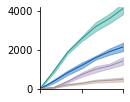

In [23]:
#INCORRECT; DOESNT DO WHAT IT SHOULD

def get_cumulative_licks(data):
    
    bins = range(0, 1801, 300)
    list_of_mice = get_list_of_mice(data)  
    
    cumulative_by_mouse = {}
    
    def get_licks(data, mouse):
        licks = []
        for key, val in data.items():
            if val["mouse_ID"] == mouse:
                licks.append(val["licks"])
        return licks

    for mouse in list_of_mice:
        
        licks = get_licks(data, mouse)
        flattened = np.concatenate(licks)

        histodata = np.histogram(flattened, bins=bins)
        temp_cumulative_licks = np.concatenate([np.zeros(1), np.cumsum(histodata[0])])

        cumulative_by_mouse[mouse] = temp_cumulative_licks
        
    cumulative_arrays = list(cumulative_by_mouse.values())
    return cumulative_arrays


cumulative_resticted=  get_cumulative_licks(restricted_dark)
cumulative_light=  get_cumulative_licks(adlib_light)
cumulative_dark=  get_cumulative_licks(adlib_dark)
cumulative_sucralose=  get_cumulative_licks(adlib_sucralose)

f, ax = plt.subplots(figsize=(1.5, 1.5))

# Plot the group average with shaded error
tp.shadedError(ax, cumulative_resticted, linecolor=colors_restricted, errorcolor=colors_restricted)
tp.shadedError(ax, cumulative_light, linecolor=colors_adlib_light, errorcolor=colors_adlib_light)
tp.shadedError(ax, cumulative_dark, linecolor=colors_adlib_dark, errorcolor=colors_adlib_dark)
tp.shadedError(ax, cumulative_sucralose, linecolor=colors_sucralose, errorcolor=colors_sucralose)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


ax.set_xticks([0,3, 6])
ax.set_xlim([0,6])
ax.set_ylim([0,4200])
ax.set_yticks([0,2000, 4000])
#ax.set_yticklabels([])
ax.set_xticklabels([])

#ax.set_ylabel("cumulative licks")
#ax.set_xlabel("time (min)")

#f.savefig(FIGSFOLDER /"PVH_cumulative_licks.pdf")

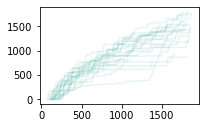

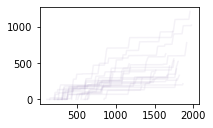

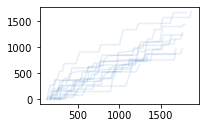

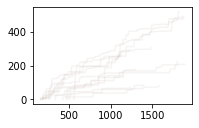

In [85]:
mice_to_exclude = ["HL313", "HL314", "HL315", "HL316", "HL317", "HL318", "HL306", "HL308",
                        "HL202", "HL205", "HL206", "HL211",
                        "HL301", "HL304", "HL305"]

def get_licks_all_mice(data):
    licks = []
    for key, val in data.items():
        if val["mouse_ID"] not in mice_to_exclude:
            licks.append(val["licks"])

    return licks

def make_cumulative_licking_fig(data, ax, color):
    
    sessions = get_licks_all_mice(data)

    for session in sessions:
        ax.plot(session, np.arange(len(session)), linestyle="-", color=color, alpha=0.1)
        

f, ax = plt.subplots(figsize=[2.3, 1.4],
                     gridspec_kw={"left": 0.02, "right": 0.98, "top": 0.98, "bottom": 0.02})

make_cumulative_licking_fig(restricted_dark, ax, colors_restricted)
    
#f.savefig(FIGSFOLDER / "PVH_cumulative_licks.pdf")

f, ax = plt.subplots(figsize=[2.3, 1.4],
                     gridspec_kw={"left": 0.02, "right": 0.98, "top": 0.98, "bottom": 0.02})

make_cumulative_licking_fig(adlib_light, ax, colors_adlib_light)
    
#f.savefig(FIGSFOLDER / "PVH_cumulative_licks.pdf")

f, ax = plt.subplots(figsize=[2.3, 1.4],
                     gridspec_kw={"left": 0.02, "right": 0.98, "top": 0.98, "bottom": 0.02})

make_cumulative_licking_fig(adlib_dark, ax, colors_adlib_dark)
    
#f.savefig(FIGSFOLDER / "PVH_cumulative_licks.pdf")

f, ax = plt.subplots(figsize=[2.3, 1.4],
                     gridspec_kw={"left": 0.02, "right": 0.98, "top": 0.98, "bottom": 0.02})
make_cumulative_licking_fig(adlib_sucralose, ax, colors_sucralose)
    
#f.savefig(FIGSFOLDER / "PVH_cumulative_licks.pdf")

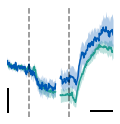

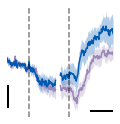

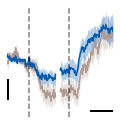

In [36]:
def plot_shaded_error(data, color, ax):
    
    pre = 5
    post = 10
    mineventlength=8
    binlength=0.1

    eventbalance=[6,2]

    try:
        assert(eventbalance[0] + eventbalance[1] == mineventlength)
        early_t = eventbalance[0]
        late_t = eventbalance[1]
    except:
        print("No event balance given. Using default 50-50 split.")
        early_t = mineventlength/2
        late_t = mineventlength/2

    bins_early = int((pre + early_t) / binlength)
    bins_late = int((post + late_t) / binlength)

    # data1
    x1 = np.arange(0,bins_early)
    x2 = np.arange(data.shape[1] - bins_late, data.shape[1])

    mean = np.mean(data, axis=0)
    error_values = np.std(data, axis=0) / np.sqrt(len(data))

    ax.plot(x1, mean[:bins_early], color=color)
    ax.plot(x2, mean[-bins_late:], color=color)

    ax.fill_between(x1, mean[:bins_early]-error_values[:bins_early], 
                    mean[:bins_early]+error_values[:bins_early], 
                    color=color, alpha=0.3,
                    linewidth=0,
                    )
    ax.fill_between(x2, mean[-bins_late:]-error_values[-bins_late:], 
                    mean[-bins_late:]+error_values[-bins_late:], 
                    color=color, alpha=0.3,
                    linewidth=0
                    )
    

def make_snips_plot(data1, data2, color1, color2):
    
    f, ax =plt.subplots(figsize=[1.8,1.6],
                    gridspec_kw={
                                "hspace":0.3,
                                "left":0.16,
                                "right":0.98,
                                "top":0.98,
                                "bottom":0.02}
                    )



    # data2
    
    plot_shaded_error(data1, color1, ax)
    plot_shaded_error(data2, color2, ax)

    for spine in ["top", "right", "left", "bottom"]:
        ax.spines[spine].set_visible(False)

    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_xlim([0,240])

    transform = blended_transform_factory(ax.transData, ax.transAxes)
    ax.plot([190,240], [0.05, 0.05], linewidth=2, color="k", transform=transform)

    ax.plot([2,2], [-1, -2], linewidth=2, color="k")

    ax.axvline(50, color="k", linestyle="--", alpha=0.5)
    ax.axvline(140, color="k", linestyle="--", alpha=0.5)
    
    return f

f = make_snips_plot(restricted_full, dark_full, colors_restricted, colors_adlib_dark)
#f.savefig(FIGSFOLDER / "PVH_hungry_vs_not_snips.pdf")

f = make_snips_plot(light_full, dark_full, colors_adlib_light, colors_adlib_dark)
#f.savefig(FIGSFOLDER / "PVH_light_vs_dark_snips.pdf")

f = make_snips_plot(sucralose_full, dark_full, colors_sucralose, colors_adlib_dark)
#f.savefig(FIGSFOLDER / "PVH_calories_vs_not_snips.pdf")

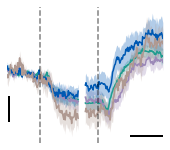

In [47]:
f, ax =plt.subplots(figsize=[2.8,2.5]
                )

plot_shaded_error(restricted_full, colors_restricted, ax)
plot_shaded_error(light_full, colors_adlib_light, ax)
plot_shaded_error(dark_full, colors_adlib_dark, ax)
plot_shaded_error(sucralose_full, colors_sucralose, ax)

for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)

ax.set_yticks([])
ax.set_xticks([])
ax.set_xlim([0,240])

transform = blended_transform_factory(ax.transData, ax.transAxes)
ax.plot([190,240], [0.05, 0.05], linewidth=2, color="k", transform=transform)

ax.plot([2,2], [-1, -2], linewidth=2, color="k")

ax.axvline(50, color="k", linestyle="--", alpha=0.5)
ax.axvline(140, color="k", linestyle="--", alpha=0.5)


f.savefig(FIGSFOLDER / "PVH_all_snips.pdf")


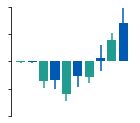

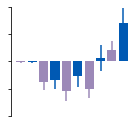

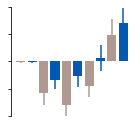

In [129]:
def auc(data, epoch=(50, 70)):
    """Compute area under the curve (AUC) for a given epoch, normalized by the epoch length."""
    epoch_data = np.array(data)[:, epoch[0]:epoch[1]]
    auc_value = np.trapz(epoch_data, axis=1)
    epoch_length = epoch[1] - epoch[0]  # Calculate the epoch length
    return auc_value / epoch_length  # Normalize by epoch length

def mean_auc(data, epoch=(50, 70)):
    """Compute the mean normalized AUC for a given epoch."""
    return np.mean(auc(data, epoch=epoch))

baseline_epoch = (10, 50)
early_lick_epoch = (50, 110)
late_lick_epoch = (120, 140)
early_post_epoch = (140, 190)
late_post_epoch = (190, 240)

def make_AUC_plot(snips1, snips2, colors1, colors2):
    
    snips = [snips1, snips2]
    colors = [colors1, colors2]
    
    epochs = [baseline_epoch, early_lick_epoch, late_lick_epoch, early_post_epoch, late_post_epoch]
    
    f, ax = plt.subplots(figsize=[2.2, 2])  

    mean_aucs = []
    std_errors = []

    # Collect normalized AUC data
    for epoch in epochs:
        for snip in snips:
            auc_data = auc(snip, epoch=epoch)
            mean_aucs.append(np.mean(auc_data))
            std_errors.append(np.std(auc_data) / np.sqrt(len(auc_data)))

      # Plotting 
    x_positions = np.arange(len(mean_aucs)) 

    # Plot the bars
    for i, (x, mean_auc, color) in enumerate(zip(x_positions, mean_aucs, colors * len(epochs))):
        ax.bar(x, mean_auc, color=color)
    
    # Plot the error bars with matching colors
    for x, ymean, yerr, color in zip(x_positions, mean_aucs, std_errors, colors * len(epochs)):
        ax.errorbar(x, ymean, yerr=yerr, color=color)

    ax.set_xticks([])
    ax.set_yticks([2, 1, 0, -1, -2])
    ax.set_ylim([-2, 2])
    ax.set_yticklabels([])

    # Hide spines
    for spine in ["top", "right", "bottom"]:
        ax.spines[spine].set_visible(False)
    
    return f  # Return the figure object

# Save the plots
f = make_AUC_plot(restricted_full, dark_full, colors_restricted, colors_adlib_dark)
f.savefig(FIGSFOLDER / "PVH_AUC_hunger.pdf")

f = make_AUC_plot(light_full, dark_full, colors_adlib_light, colors_adlib_dark)
f.savefig(FIGSFOLDER / "PVH_AUC_time.pdf")

f = make_AUC_plot(sucralose_full, dark_full, colors_sucralose, colors_adlib_dark)
f.savefig(FIGSFOLDER / "PVH_AUC_calories.pdf")



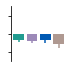

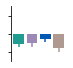

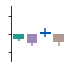

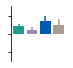

In [160]:
def auc(data, epoch=(50, 70)):
    """Compute area under the curve (AUC) for a given epoch, normalized by the epoch length."""
    epoch_data = np.array(data)[:, epoch[0]:epoch[1]]
    auc_value = np.trapz(epoch_data, axis=1)
    epoch_length = epoch[1] - epoch[0]  # Calculate the epoch length
    return auc_value / epoch_length  # Normalize by epoch length

def mean_auc(data, epoch=(50, 70)):
    """Compute the mean normalized AUC for a given epoch."""
    return np.mean(auc(data, epoch=epoch))

baseline_epoch = (10, 50)
early_lick_epoch = (50, 110)
late_lick_epoch = (120, 140)
early_post_epoch = (140, 190)
late_post_epoch = (190, 240)


def make_AUC_plot(epoch):
    snips = [restricted_full, light_full, dark_full, sucralose_full]
    colors = [colors_restricted, colors_adlib_light, colors_adlib_dark, colors_sucralose]

    f, ax = plt.subplots(figsize=[1, 1])  

    mean_aucs = []
    std_errors = []

    # Collect normalized AUC data
    for snip in snips:
        auc_data = auc(snip, epoch=epoch)
        mean_aucs.append(np.mean(auc_data))
        std_errors.append(np.std(auc_data) / np.sqrt(len(auc_data)))

    # Plotting 
    x_positions = np.arange(len(mean_aucs)) 

    ax.bar(x_positions, mean_aucs, color=colors)

    for x, ymean, yerr, color in zip(x_positions, mean_aucs, std_errors, colors):
        ax.errorbar(x, ymean, yerr=yerr, color=color, zorder=0)

    ax.set_xticks([])
    ax.set_yticks([2, 0, -2])
    ax.set_ylim([-3, 3])
    ax.set_yticklabels([])

    # Hide spines
    for spine in ["top", "right", "bottom"]:
        ax.spines[spine].set_visible(False)
    
    return f  # Return the figure object

# Save the plots
f = make_AUC_plot(early_lick_epoch)
f.savefig(FIGSFOLDER / "PVH_AUC_early_lick_epoch.pdf")

f = make_AUC_plot(late_lick_epoch)
f.savefig(FIGSFOLDER / "PVH_AUC_late_lick_epoch.pdf")

f = make_AUC_plot(early_post_epoch)
f.savefig(FIGSFOLDER / "PVH_AUC_early_post_epoch.pdf")

f = make_AUC_plot(late_post_epoch)
f.savefig(FIGSFOLDER / "PVH_AUC_late_post_epoch.pdf")


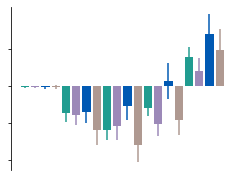

In [90]:
conditions = ["restricted", 'light', 'dark', "sucralose"]

epochs = [baseline_epoch, early_lick_epoch, late_lick_epoch, early_post_epoch, late_post_epoch]

snips = [restricted_full, light_full, dark_full, sucralose_full]
colors = [colors_restricted, colors_adlib_light, colors_adlib_dark, colors_sucralose]

f, ax = plt.subplots(figsize=[4, 3])  

mean_aucs = []
std_errors = []

# Collect normalized AUC data
for epoch in epochs:
    for snip in snips:
        auc_data = auc(snip, epoch=epoch)
        mean_aucs.append(np.mean(auc_data))
        std_errors.append(np.std(auc_data) / np.sqrt(len(auc_data)))

# Plotting 
x_positions = np.arange(len(mean_aucs)) 

ax.bar(x_positions, mean_aucs, color=colors * len(epochs))

for x, ymean, yerr, color in zip(x_positions, mean_aucs, std_errors, colors * len(epochs)):
    ax.errorbar(x, ymean, yerr=yerr, color=color, zorder=0)
    

ax.set_xticks([])
ax.set_yticks([1, 0, -1, -2])
ax.set_yticklabels([])
#ax.set_yticklabels([])

# Hide spines
for spine in ["top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

## Save the figure
#f.savefig(FIGSFOLDER / "PVH_AUC_all.pdf")

plt.show()

#getting CSV file for stats
epoch_labels = ["baseline_epoch", "early_lick_epoch", "late_lick_epoch", "early_post_epoch", "late_post_epoch"]

# Correcting headers generation
headers = []
for epoch_label in epoch_labels:
    for condition in conditions:
        headers.append(f'{condition} {epoch_label}')

# Initialize list to hold AUC data across all epochs
auc_all_epochs = []

for epoch in epochs:
    # Stack AUC data for all conditions for this epoch
    auc_epoch = np.column_stack([auc(snip, epoch=epoch) for snip in snips])
    auc_all_epochs.append(auc_epoch)

# Convert list of AUC arrays into a single array
auc_all_epochs = np.hstack(auc_all_epochs)

# Create the header array with correct shape
headers_array = np.array(headers).reshape(1, -1)

# Check if headers and AUC data have the same number of columns
assert headers_array.shape[1] == auc_all_epochs.shape[1], \
    "Mismatch between headers and AUC data column counts."

# Stack headers and data
auc_with_headers = np.vstack([headers_array, auc_all_epochs])

# Save to a CSV file
#np.savetxt('C:/Users/kvo019/OneDrive - UiT Office 365/Pipette 2/People/Linnea/Manuscripts/hislight paper/PVH_AUC_all_conditions.csv', auc_with_headers, delimiter=',', fmt='%s')
